In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


            Price   Open   High    Low     Vol. Change %
Date                                                    
2018-01-02  43.06  42.54  43.08  42.31  102.22M    1.77%
2018-01-03  43.06  43.13  43.64  42.99  118.07M    0.00%
2018-01-04  43.26  43.13  43.37  43.02   89.74M    0.46%
2018-01-05  43.75  43.36  43.84  43.26   94.64M    1.13%
2018-01-08  43.59  43.59  43.90  43.48   82.27M   -0.37%


In [37]:
# 2.  chia train test validate theo tỉ lệ 7:3
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Price']] # Biến phụ thuộc theo mảng 2 chiều



In [38]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 0.1, 'gamma': 0.001}
Best score: 56.530683767936054


In [39]:
# dự đoán test

y_pred = svr_rbf.predict(x_test)
y_pred


array([163.55759818, 164.7197031 , 165.47953518, 167.05630863,
       163.6845942 , 163.16839537, 161.12250458, 161.62398547,
       158.79963559, 157.77485816, 152.98487905, 154.34395782,
       158.43917252, 159.36477091, 162.64658158, 164.47171557,
       167.58251988, 170.96130321, 172.54056761, 173.72449795,
       174.18500544, 177.3303326 , 177.847779  , 176.44012419,
       173.31155047, 176.86442856, 176.69048793, 172.00531598,
       171.72106316, 170.05311423, 167.17981562, 168.04951919,
       169.27359501, 169.51555171, 164.7197031 , 165.94375945,
       167.02546229, 169.78944717, 165.99441245, 161.39651725,
       160.61455918, 158.24528677, 162.67546564, 164.32338628,
       156.80706635, 159.09586855, 164.6005484 , 162.26260575,
       157.9223903 , 154.58615224, 155.4308987 , 154.23203484,
       145.26364156, 147.15768114, 146.58156205, 148.80390919,
       146.42228663, 140.69388378, 139.72684034, 142.30697871,
       141.00635452, 140.82491121, 143.39520692, 148.71

In [40]:
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[195.69]])

In [41]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([175.78835996]),
 array([174.24437294]),
 array([172.6497692]),
 array([170.97162152]),
 array([169.20173099]),
 array([167.3568985]),
 array([165.47641619]),
 array([163.61267996]),
 array([161.81659876]),
 array([160.12477073]),
 array([158.55443379]),
 array([157.10611188]),
 array([155.76967494]),
 array([154.52999471]),
 array([153.370718]),
 array([152.27627476]),
 array([151.23272299]),
 array([150.22796489]),
 array([149.25167615]),
 array([148.29513513]),
 array([147.35104189]),
 array([146.41336489]),
 array([145.47722583]),
 array([144.53881955]),
 array([143.59535846]),
 array([142.64502734]),
 array([141.68693224]),
 array([140.72102775]),
 array([139.74800988]),
 array([138.76916758])]

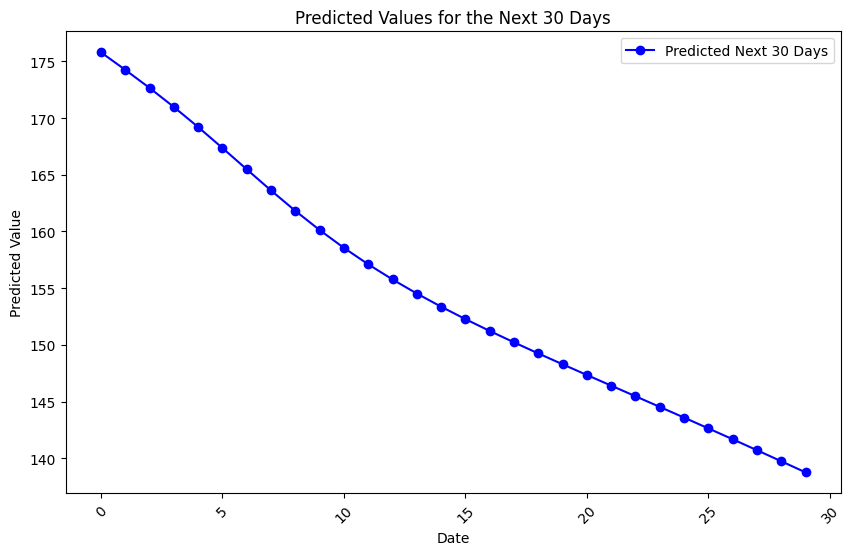

In [42]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [43]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [44]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 4.786848991967506
Testing MAPE: 0.014872745031447775
Testing MAE: 2.5879774249108216


In [45]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: 4.786848991967506
Testing MAPE: 0.014872745031447775
Testing MAE: 2.5879774249108216


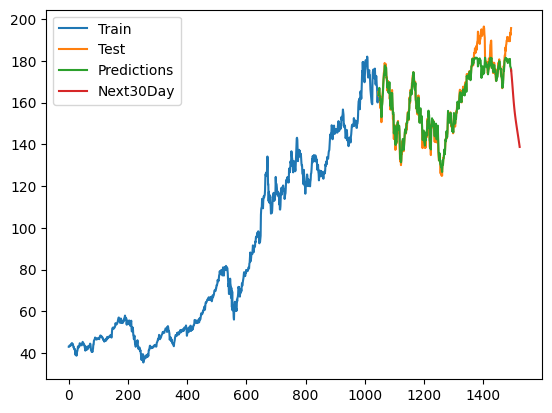

In [46]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()